In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [ ]:
# Load data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten 28x28 images to 784
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Input
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(10, activation='relu')(encoded)  # 2D latent space (was 2 before, did horrible)(did too good on 16 layers, now we are trying with lesser layers-6)(last try with 5 layers)
#6 layers did best
#We trained again in 10 layers to visualize PCA
# Decoder
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
output_img = Dense(784, activation='sigmoid')(decoded)  # pixel values 0-1

# Model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1086 - val_loss: 0.0502
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0474 - val_loss: 0.0388
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0373 - val_loss: 0.0335
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0332 - val_loss: 0.0312
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0312 - val_loss: 0.0299
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - val_loss: 0.0290
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0294 - val_loss: 0.0284
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0287 - val_loss: 0.0280
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0281 - val_loss: 0.0275
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0278 - val_loss: 0.0271
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0273 - val_loss: 0.0266
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


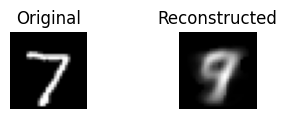

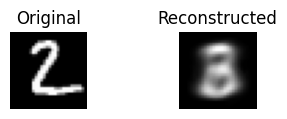

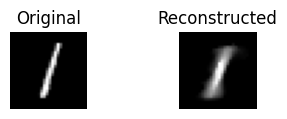

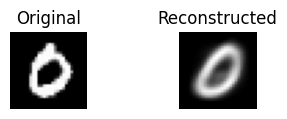

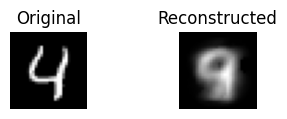

In [ ]:
#Done on 2 layers in latent space - Bomi ay
decoded_imgs = autoencoder.predict(x_test)

# Show first 5 images
for i in range(5):
    plt.figure(figsize=(4,1))

    # Original
    plt.subplot(1,2,1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(1,2,2)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


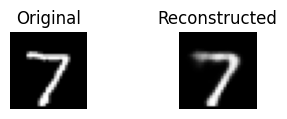

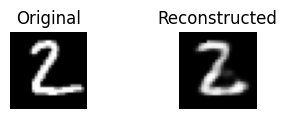

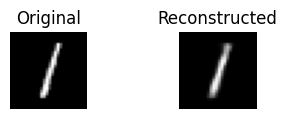

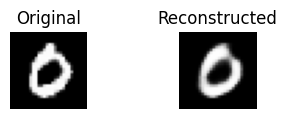

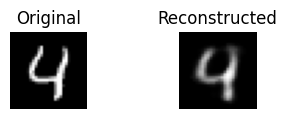

In [ ]:
#Done on 16 layers in latent space - Didi much better
decoded_imgs = autoencoder.predict(x_test)

# Show first 5 images
for i in range(5):
    plt.figure(figsize=(4,1))

    # Original
    plt.subplot(1,2,1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(1,2,2)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


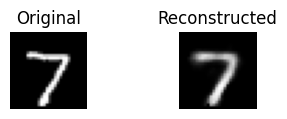

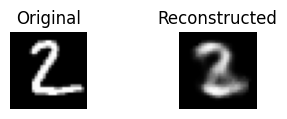

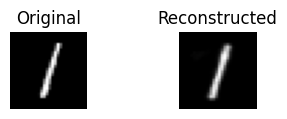

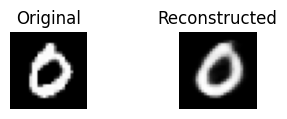

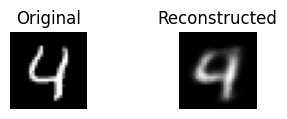

In [ ]:
#Done on 6 layers in latent space - Did good, some noise are prevelant..
decoded_imgs = autoencoder.predict(x_test)

# Show first 5 images
for i in range(5):
    plt.figure(figsize=(4,1))

    # Original
    plt.subplot(1,2,1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(1,2,2)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


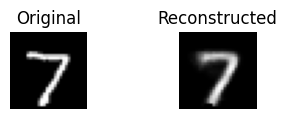

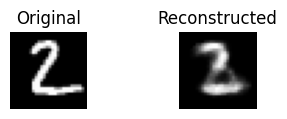

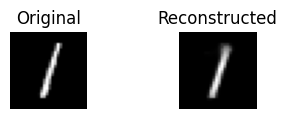

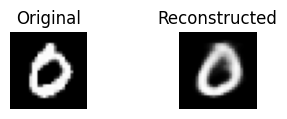

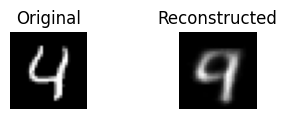

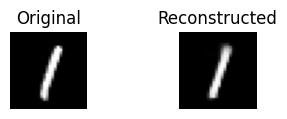

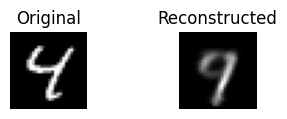

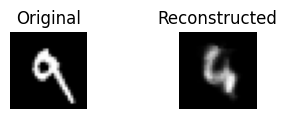

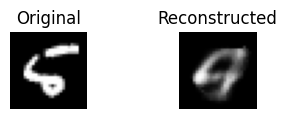

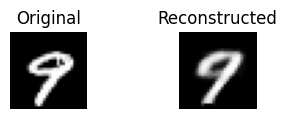

In [ ]:
#Done on 5 layers in latent space - Did good, some noise are prevelant, and predicted one less image good....
decoded_imgs = autoencoder.predict(x_test)

# Show first 5 images
for i in range(10):
    plt.figure(figsize=(4,1))

    # Original
    plt.subplot(1,2,1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(1,2,2)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


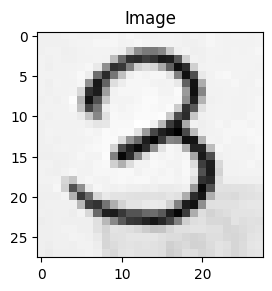

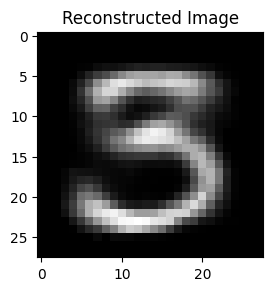

In [ ]:
#Tested with my image
from PIL import Image
import numpy as np

# Load your image
img = Image.open('/content/auto3.jpg')  # replace with your file path

# Convert to grayscale
img = img.convert('L')  # 'L' = 8-bit grayscale

# Resize to 28x28
img = img.resize((28, 28))

# Convert to numpy array
img_array = np.array(img)

# Normalize pixel values to 0-1
img_array = img_array.astype('float32') / 255.

# Flatten to 1D vector (784)
img_array = img_array.reshape(1, 784)

# Now you can feed it into your autoencoder
reconstructed = autoencoder.predict(img_array)

# Reshape reconstructed output back to 28x28 for visualization
reconstructed_img = reconstructed.reshape(28, 28)

# Optional: visualize
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.show()

plt.subplot(1,2,2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title("Reconstructed Image")
plt.show()


In [ ]:
from tensorflow.keras.losses import MeanSquaredError

# Initialize MSE loss
mse = MeanSquaredError()

# Compute loss between original input and reconstructed output
loss_value = mse(img_array, reconstructed).numpy()

print("Reconstruction Loss:", loss_value)


Reconstruction Loss: 0.37358272


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


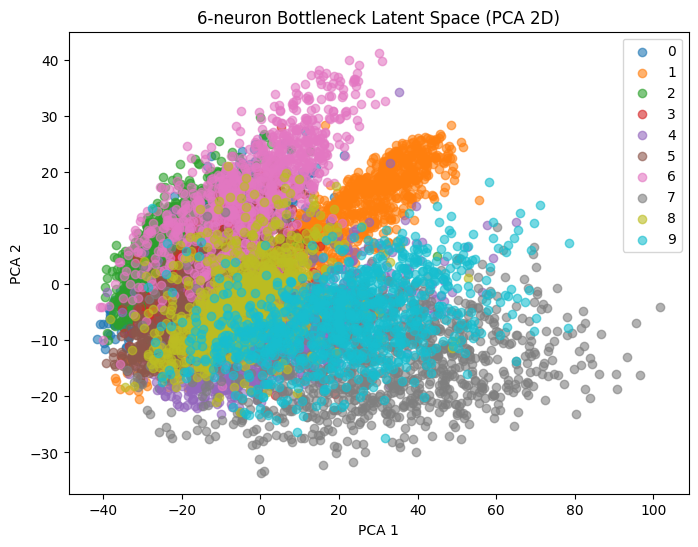

In [ ]:
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'autoencoder' is your trained model
# Extract the encoder part (up to bottleneck)
encoder = Model(autoencoder.input, autoencoder.layers[3].output)  # adjust layer index for bottleneck

# Get bottleneck vectors for test set
latent_vectors = encoder.predict(x_test)  # shape: (num_samples, 6)

# Reduce 6D → 2D for visualization using PCA
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_vectors)

# Optional: if you have labels for test set
(_, y_test_labels) = mnist.load_data()[1]  # second tuple of MNIST test set

# Plot
plt.figure(figsize=(8,6))
for digit in range(10):
    idxs = np.where(y_test_labels == digit)
    plt.scatter(latent_2d[idxs,0], latent_2d[idxs,1], label=str(digit), alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("6-neuron Bottleneck Latent Space (PCA 2D)")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


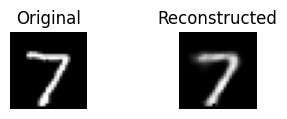

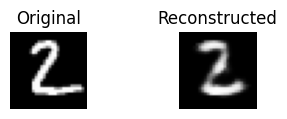

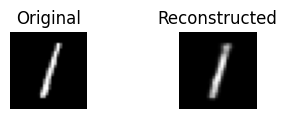

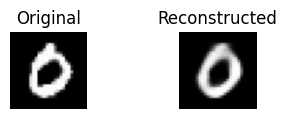

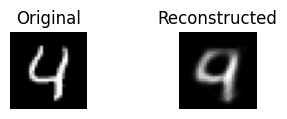

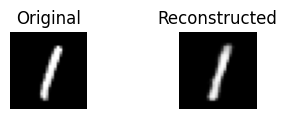

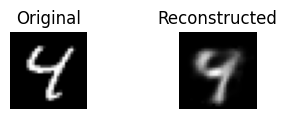

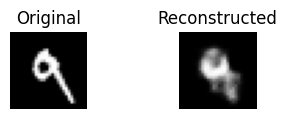

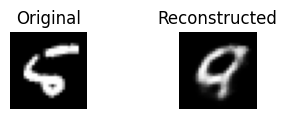

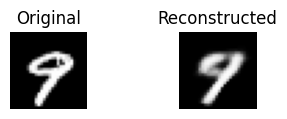

In [ ]:
#Done on 10 layers in latent space - For PCA visualization, clustering visualization
decoded_imgs = autoencoder.predict(x_test)

# Show first 5 images
for i in range(10):
    plt.figure(figsize=(4,1))

    # Original
    plt.subplot(1,2,1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(1,2,2)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


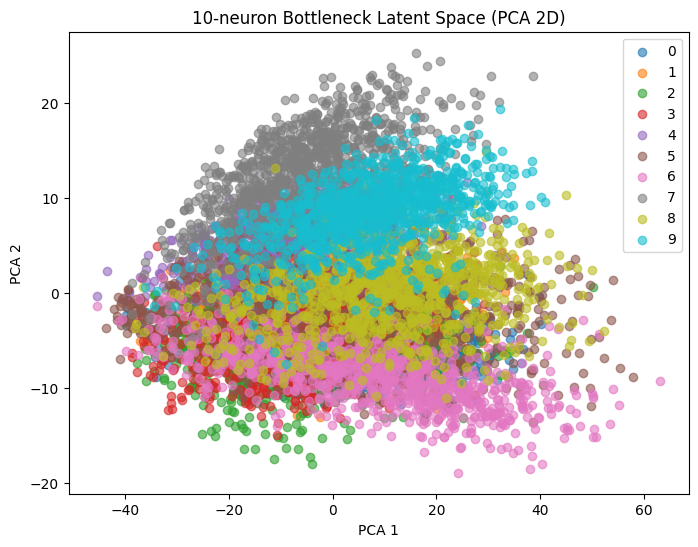

In [ ]:
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'autoencoder' is your trained model
# Extract the encoder part (up to bottleneck)
encoder = Model(autoencoder.input, autoencoder.layers[3].output)  # adjust layer index for bottleneck

# Get bottleneck vectors for test set
latent_vectors = encoder.predict(x_test)  # shape: (num_samples, 6)

# Reduce 6D → 2D for visualization using PCA
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_vectors)

# Optional: if you have labels for test set
(_, y_test_labels) = mnist.load_data()[1]  # second tuple of MNIST test set

# Plot
plt.figure(figsize=(8,6))
for digit in range(10):
    idxs = np.where(y_test_labels == digit)
    plt.scatter(latent_2d[idxs,0], latent_2d[idxs,1], label=str(digit), alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("10-neuron Bottleneck Latent Space (PCA 2D)")
plt.legend()
plt.show()